In [48]:
#loads the relevant libraries
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import *
import pandas as pd
import pgeocode
from shapely.geometry import Point 
import geoplot as gplt
import geoplot.crs as gcrs
import geopy.distance
import math

In [52]:
#loads the database of libraries
#I generated this list based on a combination of the croydon borough council website and internet searches
croydon_libs = pd.read_csv("croydon_libraries.csv")
pcode = pgeocode.Nominatim(country="GB")

In [62]:
croydon_libs['longlat'] = list(zip(croydon_libs['Latitude'], croydon_libs['Longitude']))

In [63]:
croydon_libs

,library,address_1,address_2,address_3,postcode,Latitude,Longitude,closing,longlat
0,New Addington Library,Central Parade,New Addington,NaN,CR0 0JD,51.34103,-0.01409,False,"(51.341029999999996, -0.01409)"
1,Broad Green Library,89 Canterbury Road,NaN,Croydon,CR0 3HA,51.38576,-0.11658,True,"(51.38576, -0.11657999999999999)"
2,Shirley Library,Wickham Road / Hartland Way,Shirley,Croydon,CR0 8BH,51.37513,-0.04485,True,"(51.37513, -0.04485)"
3,Sanderstead Library,Farm Fields,NaN,South Croydon,CR2 0HL,51.34079,-0.08352,True,"(51.340790000000005, -0.08352000000000001)"
4,Selsdon Library,Selsdon Library,Addington Road,Selsdon,CR2 8LA,51.34228,-0.06327,False,"(51.34228, -0.06327)"
5,Bradmore Green Library,Bradmore Way,Coulsdon,Croydon,CR5 1PE,51.30853,-0.12657,True,"(51.30853, -0.12657000000000002)"
6,Coulsdon Library,Brighton Road,Coulsdon,NaN,CR5 2NH,51.32000,-0.13869,False,"(51.32, -0.13869)"
7,Thornton Heath Library,190 Brigstock Road,Thornton Heath,NaN,CR7 7JB,51.39739,-0.10424,False,"(51.39739, -0.10424000000000001)"
8,Purley Library,Banstead Road,Purley,NaN,CR8 3YH,51.33914,-0.11869,False,"(51.33914, -0.11869)"
9,Central Library,Croydon Clocktower,Katharine Street,Croydon,CR9 1ET,51.37191,-0.09953,False,"(51.37191, -0.09953)"


In [64]:
#creates a geometry column for use in geographic plotting
croydon_libs['geometry'] = [Point(xy) for xy in zip(croydon_libs['longlat'])]

In [65]:
#check the libraries dataframe with the geometry added
croydon_libs

,library,address_1,address_2,address_3,postcode,Latitude,Longitude,closing,longlat,geometry
0,New Addington Library,Central Parade,New Addington,NaN,CR0 0JD,51.34103,-0.01409,False,"(51.341029999999996, -0.01409)",POINT (51.34103 -0.01409)
1,Broad Green Library,89 Canterbury Road,NaN,Croydon,CR0 3HA,51.38576,-0.11658,True,"(51.38576, -0.11657999999999999)",POINT (51.38576 -0.11658)
2,Shirley Library,Wickham Road / Hartland Way,Shirley,Croydon,CR0 8BH,51.37513,-0.04485,True,"(51.37513, -0.04485)",POINT (51.37513 -0.04485)
3,Sanderstead Library,Farm Fields,NaN,South Croydon,CR2 0HL,51.34079,-0.08352,True,"(51.340790000000005, -0.08352000000000001)",POINT (51.34079000000001 -0.08352000000000001)
4,Selsdon Library,Selsdon Library,Addington Road,Selsdon,CR2 8LA,51.34228,-0.06327,False,"(51.34228, -0.06327)",POINT (51.34228 -0.06327000000000001)
5,Bradmore Green Library,Bradmore Way,Coulsdon,Croydon,CR5 1PE,51.30853,-0.12657,True,"(51.30853, -0.12657000000000002)",POINT (51.30853 -0.12657)
6,Coulsdon Library,Brighton Road,Coulsdon,NaN,CR5 2NH,51.32000,-0.13869,False,"(51.32, -0.13869)",POINT (51.32 -0.13869)
7,Thornton Heath Library,190 Brigstock Road,Thornton Heath,NaN,CR7 7JB,51.39739,-0.10424,False,"(51.39739, -0.10424000000000001)",POINT (51.39739 -0.10424)
8,Purley Library,Banstead Road,Purley,NaN,CR8 3YH,51.33914,-0.11869,False,"(51.33914, -0.11869)",POINT (51.33914 -0.11869)
9,Central Library,Croydon Clocktower,Katharine Street,Croydon,CR9 1ET,51.37191,-0.09953,False,"(51.37191, -0.09953)",POINT (51.37191 -0.09952999999999999)


In [66]:
#reads in the database of postcodes in Croydon borough
#source:https://www.doogal.co.uk/AdministrativeAreas.php?district=E09000008
croydon_pcodes = pd.read_csv("croydon postcodes.csv")

In [67]:
#creates a geometric point for each postcode (not currently used)
croydon_pcodes['geometry'] = [Point(xy) for xy in zip(croydon_pcodes['Longitude'], croydon_pcodes['Latitude'])]

In [68]:
#converts the dataframe for geographic plotting (not currently used)
croydon_pcodes_gpd = gpd.GeoDataFrame(croydon_pcodes)

In [69]:
#combines the longitude and latitude into one cell
croydon_pcodes_gpd['longlat'] = list(zip(croydon_pcodes_gpd['Latitude'],croydon_pcodes_gpd['Longitude']))

In [70]:
#check the postcodes dataframe
croydon_pcodes_gpd

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,Terminated,Altitude,Country,Last Updated,Quality,LSOA Code,LSOA Name,geometry,longlat
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,NaN,68,England,2021-02-21,Within the building of the matched address clo...,E01001135,Croydon 025D,POINT (-0.02730 51.37871),"(51.378710999999996, -0.027304000000000002)"
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,NaN,156,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00506 51.34034),"(51.340340000000005, -0.0050609999999999995)"
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,NaN,159,England,2021-02-21,Within the building of the matched address clo...,E01001081,Croydon 036D,POINT (-0.00211 51.33759),"(51.337592, -0.0021079999999999996)"
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,NaN,163,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00133 51.33532),"(51.335321, -0.0013310000000000002)"
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,NaN,157,England,2021-02-21,Within the building of the matched address clo...,E01001079,Croydon 036B,POINT (-0.00453 51.34072),"(51.340719, -0.004528)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,SW16 5TR,Yes,51.412446,-0.127191,530341,169822,TQ303698,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,35,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12719 51.41245),"(51.412446, -0.127191)"
13134,SW16 5TS,Yes,51.412012,-0.125929,530430,169776,TQ304697,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,36,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12593 51.41201),"(51.412012, -0.12592899999999999)"
13135,SW16 5TT,Yes,51.410608,-0.124738,530517,169622,TQ305696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,37,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12474 51.41061),"(51.410608, -0.12473800000000002)"
13136,SW16 5TU,Yes,51.410552,-0.125212,530484,169615,TQ304696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,NaN,37,England,2021-02-21,Within the building of the matched address clo...,E01001085,Croydon 004A,POINT (-0.12521 51.41055),"(51.410552, -0.125212)"


In [71]:
#Function for calculating distance in metres based on two longlat points
#Source:
# Haversine formula example in Python
# Author: Wayne Dyck
# https://gist.github.com/rochacbruno/2883505
# modified by me

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371000 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [72]:
#calculates the distance between each postcode and each of the libraries
for i in croydon_libs.index:
    temp_distance = []
    library = croydon_libs.loc[i]['longlat']
    column_name = croydon_libs.loc[i]['library']
    for i in croydon_pcodes_gpd.index:
        temp_distance.append(distance(croydon_pcodes_gpd.loc[i]['longlat'],library))
    croydon_pcodes_gpd[column_name] = temp_distance

In [73]:
#check the new values
croydon_pcodes_gpd.sort_values(by='Selsdon Library')

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Selsdon Library,Bradmore Green Library,Coulsdon Library,Thornton Heath Library,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,South Norwood Library,Norbury Library
4459,CR2 8LA,Yes,51.342288,-0.063272,534992,162136,TQ349621,Selsdon Vale & Forestdale,"Croydon, unparished area",1980-01-01,...,0.900341,5782.324765,5796.327484,6754.905841,3865.334521,4145.819903,4534.765447,8726.431651,6153.249597,8115.648983
4466,CR2 8LJ,Yes,51.342967,-0.063559,534970,162211,TQ349622,Selsdon & Addington Village,"Croydon, unparished area",1980-01-01,...,78.984340,5816.570466,5811.056540,6678.039431,3853.059345,4073.831905,4459.359104,8648.800314,6075.534589,8040.550917
4464,CR2 8LG,Yes,51.342409,-0.064573,534901,162147,TQ349621,Selsdon & Addington Village,"Croydon, unparished area",1980-01-01,...,91.635575,5722.707467,5720.589445,6705.110917,3776.610794,4080.764071,4522.437738,8700.032096,6126.110260,8058.350577
4494,CR2 8PA,Yes,51.343008,-0.062193,535065,162218,TQ350622,Selsdon Vale & Forestdale,"Croydon, unparished area",1980-01-01,...,110.222769,5891.312537,5898.426186,6714.581092,3947.869689,4129.115167,4455.146078,8658.926432,6086.847408,8085.615144
4444,CR2 8JB,No,51.342668,-0.061762,535096,162181,TQ350621,Selsdon Vale & Forestdale,"Croydon, unparished area",1980-01-01,...,113.282215,5889.659214,5909.214302,6761.647119,3973.735110,4177.337023,4493.472171,8701.057221,6129.334209,8133.480912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12771,SW16 3EN,Yes,51.421674,-0.113280,531282,170873,TQ312708,Norbury Park,"Croydon, unparished area",1980-01-01,...,9485.929100,12614.826097,11442.402646,2772.095425,9185.039368,5615.127991,5526.129905,2169.846264,3707.813553,1961.373391
12784,SW16 3JE,Yes,51.422882,-0.110152,531496,171013,TQ314710,Norbury Park,"Croydon, unparished area",1980-01-01,...,9534.808398,12766.346204,11610.205997,2864.084643,9330.519721,5715.532691,5499.620660,1972.188521,3670.860507,2167.100450
12769,SW16 3EJ,Yes,51.422769,-0.112069,531363,170997,TQ313709,Norbury Park,"Croydon, unparished area",1980-01-01,...,9569.269176,12742.627089,11575.839254,2873.781266,9310.466528,5721.777587,5569.588408,2101.360447,3744.738654,2104.731609
12770,SW16 3EL,Yes,51.422625,-0.113140,531289,170979,TQ312709,Norbury Park,"Croydon, unparished area",1980-01-01,...,9580.894489,12720.999577,11548.382254,2873.097677,9291.095930,5717.751809,5602.623297,2172.476099,3780.632580,2064.317671


In [74]:
#get a list of the columns in the dataframe
croydon_pcodes_gpd.columns.tolist()

['Postcode',
 'In Use?',
 'Latitude',
 'Longitude',
 'Easting',
 'Northing',
 'Grid Ref',
 'Ward',
 'Parish',
 'Introduced',
 'Terminated',
 'Altitude',
 'Country',
 'Last Updated',
 'Quality',
 'LSOA Code',
 'LSOA Name',
 'geometry',
 'longlat',
 'New Addington Library',
 'Broad Green Library',
 'Shirley Library',
 'Sanderstead Library',
 'Selsdon Library',
 'Bradmore Green Library',
 'Coulsdon Library',
 'Thornton Heath Library',
 'Purley Library',
 'Central Library',
 'Ashburton Library',
 'Upper Norwood Library',
 'South Norwood Library',
 'Norbury Library']

In [75]:
#get the distance to the nearest library and put it in a new column
croydon_pcodes_gpd['nearest'] = croydon_pcodes_gpd.iloc[:,19:].min(axis=1)

In [76]:
#load up a spreadsheet of Index of Multiple Deprivation scores by LSOA
#source:https://opendatacommunities.org/resource?uri=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices
lsoa_imd = pd.read_csv('lsoa_imd.csv')

In [77]:
#check the dataframe
lsoa_imd.head()

,FeatureCode,DateCode,Measurement,Units,Value,Indices of Deprivation
0,E01005602,2019,Score,NaN,51.400,a. Index of Multiple Deprivation (IMD)
1,E01005478,2019,Score,NaN,27.566,a. Index of Multiple Deprivation (IMD)
2,E01005386,2019,Score,NaN,64.436,a. Index of Multiple Deprivation (IMD)
3,E01005588,2019,Score,NaN,35.244,a. Index of Multiple Deprivation (IMD)
4,E01005319,2019,Score,NaN,45.470,a. Index of Multiple Deprivation (IMD)


In [78]:
#Selects a list of those libraries that are earmarked for closure
closing_libs = list(croydon_libs['library'][croydon_libs['closing'] == True])
closing_libs

['Broad Green Library',
 'Shirley Library',
 'Sanderstead Library',
 'Bradmore Green Library',
 'South Norwood Library']

In [79]:
#creates a new version of the data excluding the closing libraries
croydon_pcodes_closing_gpd = croydon_pcodes_gpd.drop(columns=closing_libs)
croydon_pcodes_closing_gpd.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,New Addington Library,Selsdon Library,Coulsdon Library,Thornton Heath Library,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,Norbury Library,nearest
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,4289.213174,4758.794336,10122.242420,5728.420568,7721.670961,5069.901936,2531.809572,5951.230378,7250.154383,1281.264568
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,631.849522,4049.018811,9555.800233,9361.874669,7894.206917,7440.039481,6230.506631,10335.672762,10894.696509,631.849522
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,915.915924,4280.375191,9689.255995,9720.219287,8100.276915,7767.102154,6596.366418,10703.296672,11251.035924,915.915924
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,1090.203095,4371.623519,9694.821316,9933.526143,8163.676769,7940.663638,6825.732856,10947.553063,11460.816680,1090.203095
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,665.094192,4083.964605,9601.770914,9360.676204,7932.013893,7452.963376,6222.543487,10318.877928,10894.739211,665.094192


In [80]:
#check the columns in the new dataframe
list(croydon_pcodes_closing_gpd)

['Postcode',
 'In Use?',
 'Latitude',
 'Longitude',
 'Easting',
 'Northing',
 'Grid Ref',
 'Ward',
 'Parish',
 'Introduced',
 'Terminated',
 'Altitude',
 'Country',
 'Last Updated',
 'Quality',
 'LSOA Code',
 'LSOA Name',
 'geometry',
 'longlat',
 'New Addington Library',
 'Selsdon Library',
 'Coulsdon Library',
 'Thornton Heath Library',
 'Purley Library',
 'Central Library',
 'Ashburton Library',
 'Upper Norwood Library',
 'Norbury Library',
 'nearest']

In [81]:
#calculate a new value for the nearest library with the closing ones excluded
croydon_pcodes_closing_gpd['nearest'] = croydon_pcodes_closing_gpd.iloc[:,19:-1].min(axis=1)
croydon_pcodes_closing_gpd

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,New Addington Library,Selsdon Library,Coulsdon Library,Thornton Heath Library,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,Norbury Library,nearest
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,4289.213174,4758.794336,10122.242420,5728.420568,7721.670961,5069.901936,2531.809572,5951.230378,7250.154383,2531.809572
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,631.849522,4049.018811,9555.800233,9361.874669,7894.206917,7440.039481,6230.506631,10335.672762,10894.696509,631.849522
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,915.915924,4280.375191,9689.255995,9720.219287,8100.276915,7767.102154,6596.366418,10703.296672,11251.035924,915.915924
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,1090.203095,4371.623519,9694.821316,9933.526143,8163.676769,7940.663638,6825.732856,10947.553063,11460.816680,1090.203095
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,665.094192,4083.964605,9601.770914,9360.676204,7932.013893,7452.963376,6222.543487,10318.877928,10894.739211,665.094192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13133,SW16 5TR,Yes,51.412446,-0.127191,530341,169822,TQ303698,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,11166.217187,8975.280812,10310.477264,2310.241737,8172.583208,4898.988697,5516.672119,3233.033003,872.171081,872.171081
13134,SW16 5TS,Yes,51.412012,-0.125929,530430,169776,TQ304697,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,11070.380255,8890.197262,10269.551330,2215.158074,8118.559913,4820.681505,5417.575348,3161.531472,799.470919,799.470919
13135,SW16 5TT,Yes,51.410608,-0.124738,530517,169622,TQ305696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,10901.309236,8713.629871,10121.603670,2044.980600,7957.959086,4644.915109,5258.978098,3130.185810,628.192211,628.192211
13136,SW16 5TU,Yes,51.410552,-0.125212,530484,169615,TQ304696,Norbury & Pollards Hill,"Croydon, unparished area",1980-01-01,...,10920.106375,8724.367601,10112.307365,2063.556292,7953.545626,4651.647120,5282.145443,3163.279635,629.769267,629.769267


In [82]:
#add the new values to the original dataframe and calculate the difference between the two distances - the increase in distance to the nearest library, after the closures
croydon_pcodes_gpd['nearest_closing'] = croydon_pcodes_closing_gpd['nearest']
croydon_pcodes_gpd['change'] = croydon_pcodes_gpd['nearest_closing'] - croydon_pcodes_gpd['nearest'] 
croydon_pcodes_gpd['change'].describe()

count    13138.000000
mean       224.401995
std        443.525867
min          0.000000
25%          0.000000
50%          0.000000
75%        248.078372
max       1833.691495
Name: change, dtype: float64

In [83]:
#match the LSOAs in the dataframe with their IMD scores
imd_dict = {}
for i in croydon_pcodes_gpd.index:
    this_code = croydon_pcodes_gpd.loc[i]['LSOA Code']
    temp = list(lsoa_imd['Value'][lsoa_imd['FeatureCode'] == this_code])
    imd_dict[this_code] = temp[0]

In [84]:
#map these scores onto the original dataframe
croydon_pcodes_gpd['imd'] = croydon_pcodes_gpd['LSOA Code'].map(imd_dict)

In [85]:
#check the dataframe
croydon_pcodes_gpd.head()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,Ward,Parish,Introduced,...,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,South Norwood Library,Norbury Library,nearest,nearest_closing,change,imd
0,BR3 3BZ,Yes,51.378711,-0.027304,537388,166253,TQ373662,Shirley South,"Croydon, unparished area",1980-01-01,...,7721.670961,5069.901936,2531.809572,5951.230378,4027.118362,7250.154383,1281.264568,2531.809572,1250.545004,8.602
1,CR0 0AA,Yes,51.340340,-0.005061,539052,162028,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,7894.206917,7440.039481,6230.506631,10335.672762,8052.435025,10894.696509,631.849522,631.849522,0.000000,33.984
2,CR0 0AB,Yes,51.337592,-0.002108,539266,161728,TQ392617,New Addington South,"Croydon, unparished area",1980-01-01,...,8100.276915,7767.102154,6596.366418,10703.296672,8419.268456,11251.035924,915.915924,915.915924,0.000000,34.640
3,CR0 0AD,Yes,51.335321,-0.001331,539327,161477,TQ393614,New Addington South,"Croydon, unparished area",1980-01-01,...,8163.676769,7940.663638,6825.732856,10947.553063,8651.465357,11460.816680,1090.203095,1090.203095,0.000000,33.984
4,CR0 0AE,Yes,51.340719,-0.004528,539088,162071,TQ390620,New Addington South,"Croydon, unparished area",1980-01-01,...,7932.013893,7452.963376,6222.543487,10318.877928,8042.791124,10894.739211,665.094192,665.094192,0.000000,33.984


In [86]:
#arrange the postcodes into deciles by IMD score
#(Note this is their decile compared to other postcodes in the borough - not nationally)
croydon_pcodes_gpd['decile'] = pd.qcut(croydon_pcodes_gpd['imd'],10, labels=(range(1,11)))

In [87]:
#create a new dataframe grouping the rows by the decile they are in and calculating the mean of values in the group
avg_change_decile = croydon_pcodes_gpd.groupby(by='decile').mean()

In [88]:
#check the new dataframe
avg_change_decile

,Latitude,Longitude,Easting,Northing,Altitude,New Addington Library,Broad Green Library,Shirley Library,Sanderstead Library,Selsdon Library,...,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,South Norwood Library,Norbury Library,nearest,nearest_closing,change,imd
decile,,,,,,,,,,,,,,,,,,,,,
1,51.329021,-0.108150,531904.030980,160579.584294,121.926513,6921.906192,6752.750933,6894.189140,3076.429587,3983.087429,...,2733.222898,5317.954570,6997.096220,10454.872284,8083.653440,8825.037109,993.723815,1483.719403,489.995588,6.856696
2,51.343517,-0.095074,532772.137743,162215.445914,90.917510,6580.216366,6145.869088,5334.080410,3935.674480,4324.412323,...,3983.853714,4801.694583,5429.545038,8962.164846,6628.442238,7951.194464,834.658630,1125.329785,290.671155,9.654703
3,51.358369,-0.097094,532589.806818,163862.921053,78.323565,6890.971539,4831.877467,5222.773024,3765.322597,4341.206805,...,3899.660588,3887.115574,4832.932606,7272.782553,5408.008227,6152.008671,1264.807516,1340.209339,75.401823,14.470863
4,51.373939,-0.093110,532822.306991,165601.128267,65.247416,6797.044704,2458.281269,3643.564179,4048.224185,4380.823808,...,4506.919430,1252.816918,2600.005806,5225.913348,2963.306247,4163.686062,808.743589,822.320753,13.577164,17.610648
5,51.373474,-0.101423,532244.888535,165534.657643,72.668790,7845.215543,4004.482939,5387.399305,4914.037569,5500.601567,...,4643.935694,3737.099332,4572.763619,5656.131890,4352.312016,4749.146847,1012.431627,1100.411218,87.979592,19.040369
6,51.386850,-0.095032,532651.048522,167033.601213,78.510235,8207.804701,3580.981960,5072.996072,5767.785791,6122.760793,...,5843.081404,3688.821276,4049.651227,3934.419846,3423.651376,3966.370235,649.917249,725.304542,75.387293,21.142520
7,51.381086,-0.105713,531924.207004,166373.414008,61.044358,8501.525202,3083.656557,5362.735367,5835.203844,6260.021078,...,5712.703008,3517.474512,4230.414606,4860.688539,3593.070024,3677.899339,684.303784,894.462459,210.158676,24.860983
8,51.383654,-0.096292,532572.933483,166675.900598,55.286996,7554.939061,2132.343556,4073.631022,5041.991491,5353.234160,...,5333.201302,1824.359371,2861.427526,4347.186887,2491.283537,3364.768554,624.411739,872.402050,247.990311,30.605513
9,51.377998,-0.075152,534060.911146,166085.661730,78.554170,6365.943765,3870.676836,3989.603397,5417.694854,5295.084821,...,6251.535996,3331.148288,3291.943821,5022.796187,3031.059349,4854.425908,620.240765,1150.964349,530.723584,36.138280


In [89]:
#reset the index of the chart for easy manipulation
avg_change_decile.reset_index(inplace=True)

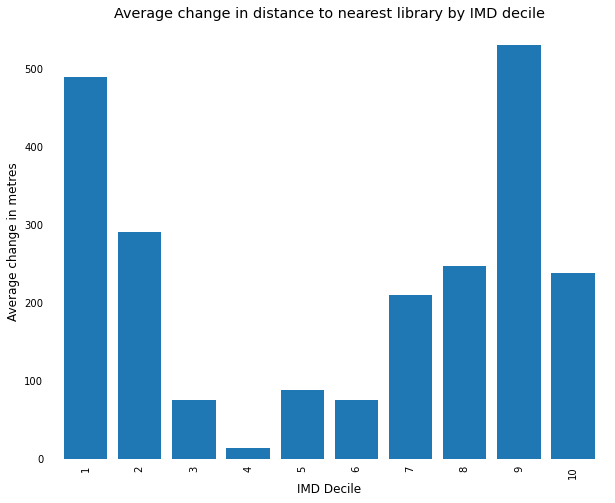

In [90]:
#plot the change in distance to nearest library by IMD decile
ax = avg_change_decile['change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_ylabel("Average change in metres", fontsize='large')
ax.axes.set_xlabel("IMD Decile", fontsize='large')
ax.axes.set_xticklabels(avg_change_decile['decile'])
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Average change in distance to nearest library by IMD decile", fontsize='x-large')
plt.savefig("change_decile.png")
plt.show()

In [112]:
#find the max change in distance for each decile
max_dict = []
for i in avg_change_decile.index:
    max_dict.append(float(croydon_pcodes_gpd['change'][croydon_pcodes_gpd['decile'] == i+1].max()))
max_dict

[1544.401559719678,
 1544.5035040147613,
 1488.007193781421,
 725.7954356766843,
 1421.2540525560025,
 1654.7321486948458,
 1550.6489826008903,
 1833.6914945358305,
 1544.4956727871447,
 1713.5348118638974]

In [113]:
#map the max change to a new column
avg_change_decile['max_change'] = max_dict

In [114]:
#check the dataframe
avg_change_decile

,decile,Latitude,Longitude,Easting,Northing,Altitude,New Addington Library,Broad Green Library,Shirley Library,Sanderstead Library,...,Central Library,Ashburton Library,Upper Norwood Library,South Norwood Library,Norbury Library,nearest,nearest_closing,change,imd,max_change
0,1,51.329021,-0.108150,531904.030980,160579.584294,121.926513,6921.906192,6752.750933,6894.189140,3076.429587,...,5317.954570,6997.096220,10454.872284,8083.653440,8825.037109,993.723815,1483.719403,489.995588,6.856696,1544.401560
1,2,51.343517,-0.095074,532772.137743,162215.445914,90.917510,6580.216366,6145.869088,5334.080410,3935.674480,...,4801.694583,5429.545038,8962.164846,6628.442238,7951.194464,834.658630,1125.329785,290.671155,9.654703,1544.503504
2,3,51.358369,-0.097094,532589.806818,163862.921053,78.323565,6890.971539,4831.877467,5222.773024,3765.322597,...,3887.115574,4832.932606,7272.782553,5408.008227,6152.008671,1264.807516,1340.209339,75.401823,14.470863,1488.007194
3,4,51.373939,-0.093110,532822.306991,165601.128267,65.247416,6797.044704,2458.281269,3643.564179,4048.224185,...,1252.816918,2600.005806,5225.913348,2963.306247,4163.686062,808.743589,822.320753,13.577164,17.610648,725.795436
4,5,51.373474,-0.101423,532244.888535,165534.657643,72.668790,7845.215543,4004.482939,5387.399305,4914.037569,...,3737.099332,4572.763619,5656.131890,4352.312016,4749.146847,1012.431627,1100.411218,87.979592,19.040369,1421.254053
5,6,51.386850,-0.095032,532651.048522,167033.601213,78.510235,8207.804701,3580.981960,5072.996072,5767.785791,...,3688.821276,4049.651227,3934.419846,3423.651376,3966.370235,649.917249,725.304542,75.387293,21.142520,1654.732149
6,7,51.381086,-0.105713,531924.207004,166373.414008,61.044358,8501.525202,3083.656557,5362.735367,5835.203844,...,3517.474512,4230.414606,4860.688539,3593.070024,3677.899339,684.303784,894.462459,210.158676,24.860983,1550.648983
7,8,51.383654,-0.096292,532572.933483,166675.900598,55.286996,7554.939061,2132.343556,4073.631022,5041.991491,...,1824.359371,2861.427526,4347.186887,2491.283537,3364.768554,624.411739,872.402050,247.990311,30.605513,1833.691495
8,9,51.377998,-0.075152,534060.911146,166085.661730,78.554170,6365.943765,3870.676836,3989.603397,5417.694854,...,3331.148288,3291.943821,5022.796187,3031.059349,4854.425908,620.240765,1150.964349,530.723584,36.138280,1544.495673
9,10,51.380413,-0.100880,532263.177606,166307.315058,52.305019,7593.101771,1922.687988,4519.731833,5040.415037,...,2141.756242,3441.429800,4878.641153,3116.962925,3449.903640,941.842919,1180.213965,238.371046,42.762965,1713.534812


In [115]:
avg_change_decile['max_change']

0    1544.401560
1    1544.503504
2    1488.007194
3     725.795436
4    1421.254053
5    1654.732149
6    1550.648983
7    1833.691495
8    1544.495673
9    1713.534812
Name: max_change, dtype: float64

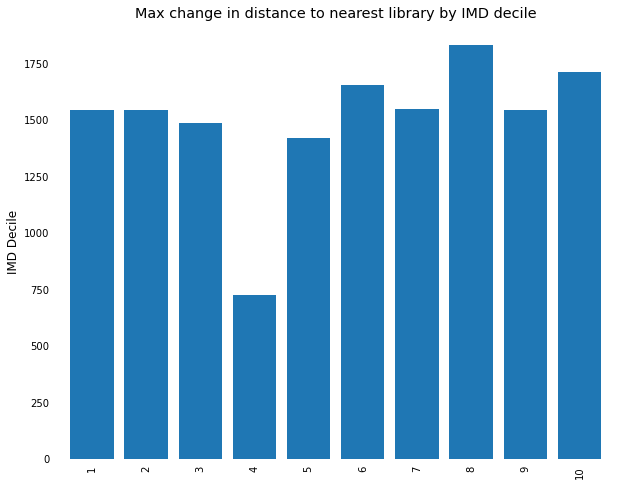

In [126]:
#plot the max change for each decile
ax = avg_change_decile['max_change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_ylabel("Max change in metres", fontsize='large')
ax.axes.set_ylabel("IMD Decile", fontsize='large')
ax.axes.set_xticklabels(avg_change_decile['decile'])
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Max change in distance to nearest library by IMD decile", fontsize='x-large')
plt.savefig("max_change_decile.png")
plt.show()

In [ ]:
avg_change_decile.to_csv('croydon_library_distances.csv')

In [ ]:
croydon_pcodes_gpd.to_csv('croydon_library_postcodes.csv')

In [117]:
#arrange the postcodes into deciles by IMD score
#(Note this is their decile compared to other postcodes in the borough - not nationally)
croydon_pcodes_gpd['quartile'] = pd.qcut(croydon_pcodes_gpd['imd'],4, labels=(range(1,5)))

In [118]:
#create a new dataframe grouping the rows by the decile they are in and calculating the mean of values in the group
avg_change_quartile = croydon_pcodes_gpd.groupby(by='quartile').mean()

In [119]:
avg_change_quartile 

,Latitude,Longitude,Easting,Northing,Altitude,New Addington Library,Broad Green Library,Shirley Library,Sanderstead Library,Selsdon Library,...,Purley Library,Central Library,Ashburton Library,Upper Norwood Library,South Norwood Library,Norbury Library,nearest,nearest_closing,change,imd
quartile,,,,,,,,,,,,,,,,,,,,,
1,51.342269,-0.098466,532539.969889,162070.321891,102.336043,6745.251405,6154.276847,5814.060859,3735.967096,4261.139017,...,3771.766532,4883.309286,5811.444985,9068.069263,6845.041385,7900.122397,1015.903012,1351.323182,335.420169,9.108170
2,51.367089,-0.098416,532472.670306,164829.905065,69.799818,7064.556330,3478.766686,4617.639695,3931.223236,4505.151118,...,4014.994035,2499.565603,3827.265560,6133.290035,4141.752287,4958.451988,958.131490,1001.611440,43.479950,17.226966
3,51.385117,-0.099729,532329.169834,166832.355303,66.610668,8288.026983,3075.247127,5019.401607,5763.270089,6130.907619,...,5796.690455,3324.039744,3885.743534,4260.267940,3235.033171,3638.796014,681.459012,836.443100,154.984087,24.276686
4,51.378955,-0.089555,533055.597299,166165.821363,63.599448,7005.552908,2751.194830,4183.959764,5073.844062,5243.441533,...,5501.958340,2464.985511,3256.931514,4946.935048,3019.909898,4077.932589,725.773574,1089.601549,363.827975,37.856484


In [123]:
avg_change_quartile.reset_index(inplace=True)

In [124]:
#find the max change in distance for each decile
max_dict_quart = []
for i in avg_change_quartile.index:
    max_dict_quart.append(float(croydon_pcodes_gpd['change'][croydon_pcodes_gpd['quartile'] == i+1].max()))
max_dict_quart

[1544.5035040147613,
 1421.2540525560025,
 1654.7321486948458,
 1833.6914945358305]

In [125]:
avg_change_quartile['max_change'] = max_dict_quart

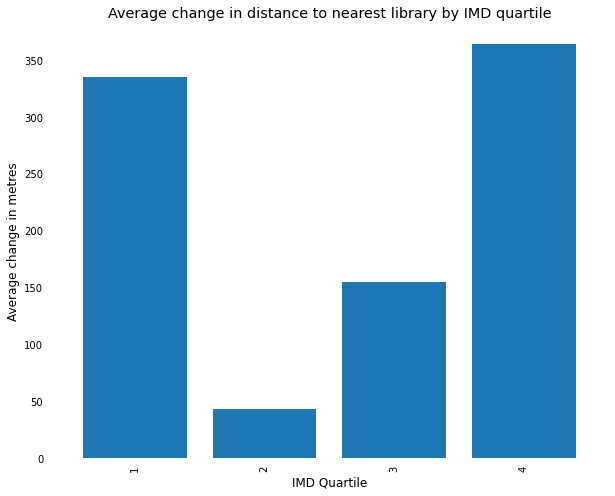

In [170]:
#plot the max change for each decile
ax = avg_change_quartile['change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_ylabel("Average change in metres", fontsize='large')
ax.axes.set_xlabel("IMD Quartile", fontsize='large')
ax.axes.set_xticklabels(avg_change_quartile['quartile'])
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Average change in distance to nearest library by IMD quartile", fontsize='x-large')
plt.savefig("change_quartile.png")
plt.show()

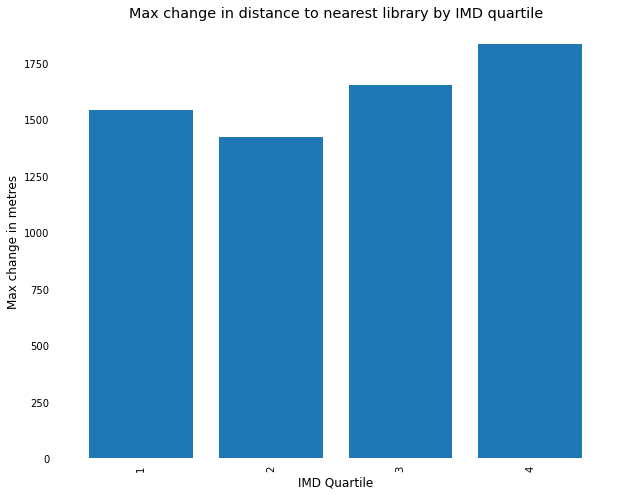

In [167]:
#plot the max change for each decile
ax = avg_change_quartile['max_change'].plot(kind='bar',
                                                  cmap='tab20',
                                                  figsize=(10,8),
                                                  sort_columns=True,
                                                  width=0.8)
handles, labels = ax.get_legend_handles_labels()
ax.axes.set_ylabel("Max change in metres", fontsize='large')
ax.axes.set_xlabel("IMD Quartile", fontsize='large')
ax.axes.set_xticklabels(avg_change_quartile['quartile'])
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Max change in distance to nearest library by IMD quartile", fontsize='x-large')
plt.savefig("max_change_quartile.png")
plt.show()

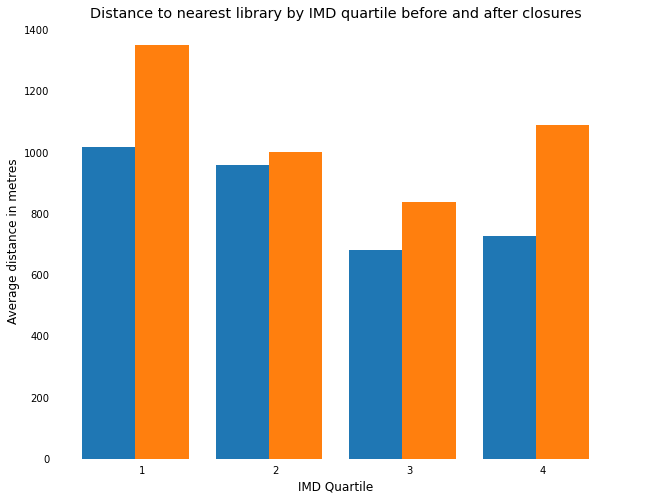

In [169]:
#plot the max change for each decile
legends = ['Before Closures', 'After Closures']
fig,ax = plt.subplots(figsize=(10,8),)
X = np.arange(4)
plt.bar(X + 0.00, avg_change_quartile['nearest'], width = 0.4)
plt.bar(X + 0.4, avg_change_quartile['nearest_closing'], width = 0.4)
ax.axes.set_ylabel("Average distance in metres", fontsize='large')
ax.axes.set_xlabel("IMD Quartile", fontsize='large')
plt.xticks(ticks=[0.25,1.25,2.25,3.25], labels=[1,2,3,4])
ax.tick_params(bottom=False, left=False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("Distance to nearest library by IMD quartile before and after closures", fontsize='x-large')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, legends, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.savefig("closest_before_after.png")
plt.show()
X = np.arange(4)
